In [1]:
from flexpart_management.notebooks.george_data_analysisV02.correlate_high_iso_days_to_cl.correlate_high_iso_days_to_cl_lfc \
    import *

Loading BokehJS ...

reload


In [2]:
def main():
    # %%
    # %%
    clus_ts = fa.open_clus_ts()
    iso_ts = fa.open_iso_ts()
    # %%
    geo_ts = fa.import_george_time_periods()
    # %%
    ds = fa.open_temp_ds_clustered_18()

    # %%
    clus_ds = clus_ts.to_xarray().to_array(dim='lab_name', name='srr_pt')
    # %%
    jan_fl = clus_ds[co.RL].dt.month == 1
    all_fl = clus_ds[co.RL].dt.month >= 0
    # UTC time. Subtract 4 to obtain local time.
    nig_fl = (clus_ds[co.RL].dt.hour <= 11) | (clus_ds[co.RL].dt.hour >= 23)
    jan_nig_fl = jan_fl & nig_fl
    george_flag = get_geo_fl(geo_ts, clus_ds)
    jn_no_iso = np.logical_and(jan_nig_fl, ~george_flag)

    # %%
    cases_flag_dic = get_geo_fl_dic(
        geo_ts=geo_ts, clus_ds=clus_ds,
        filter='jan_case'
    )
    # %%

    fls_dic = {
        'high iso'        : george_flag,
        'jan night no iso': jn_no_iso,
        'january night'   : jan_nig_fl,
        'january'         : jan_fl,
        'night'           : nig_fl,
        'all'             : all_fl,
    }

    for k, v in fls_dic.items():
        clus_ds = clus_ds.assign_coords({k: v})

    # %%
    med_ds = xr.open_dataset(pjoin(co.tmp_data_path, 'clus_medeoid_stats.nc'))
    # %%
    # %%
    order = plot_box_plot_ratio(cases_flag_dic, clus_ds, fls_dic)
    # %%
    rr = plot_comparison(clus_ds, med_ds, fls_dic, cases_flag_dic, order=None)
    # %%
    not_so_important_plot(med_ds)
    # %%
    key = 'high iso'

    plt.show()
    # %%
    med_ds.loc[
        {'stat': 'avg', 'lab_name': '02_MR', 'stat_dim': 'ZMID_AGL_stat'}][
        'stat_vals'].plot()
    plt.show()
    # %%
    ds_conc = ds[co.CONC]
    # %%
    agl_ds = get_agl_ds(ds_conc)
    # %%
    agl = False
    res_list = plot_cases_distance(agl, cases_flag_dic, ds_conc, fls_dic)
    # %%
    agl = True
    res_list = plot_cases_distance(agl, cases_flag_dic, ds_conc, fls_dic)
    # %%
    plot_z_per(cases_flag_dic, ds_conc, fls_dic)
    # %%
    plot_z_per(cases_flag_dic, agl_ds, fls_dic, agl=True)

    # %%
    _ser = pd.Series(cases_flag_dic)
    # %%
    f, axs = plt.subplots(
        2, 5, figsize=(12, 12),
        sharey=True, sharex=True)
    for i, (k, v) in enumerate(_ser.items()):
        print(k)
        ax = axs.flatten()[i]
        plot_box_plot_ratio(
            _ser.loc[[k]].to_dict(),
            clus_ds, fls_dic, order=order[::-1],
            ax=ax
        )
        ax.grid(axis='y',linestyle=':')
        ax.set_title(k)
    [ax.set_ylabel('') for ax in axs[:, 1:].flatten()]
    [ax.set_xlabel('') for ax in axs[:-1, :].flatten()]

    f.show()

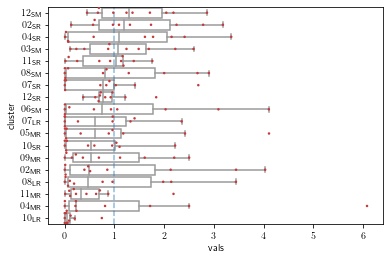

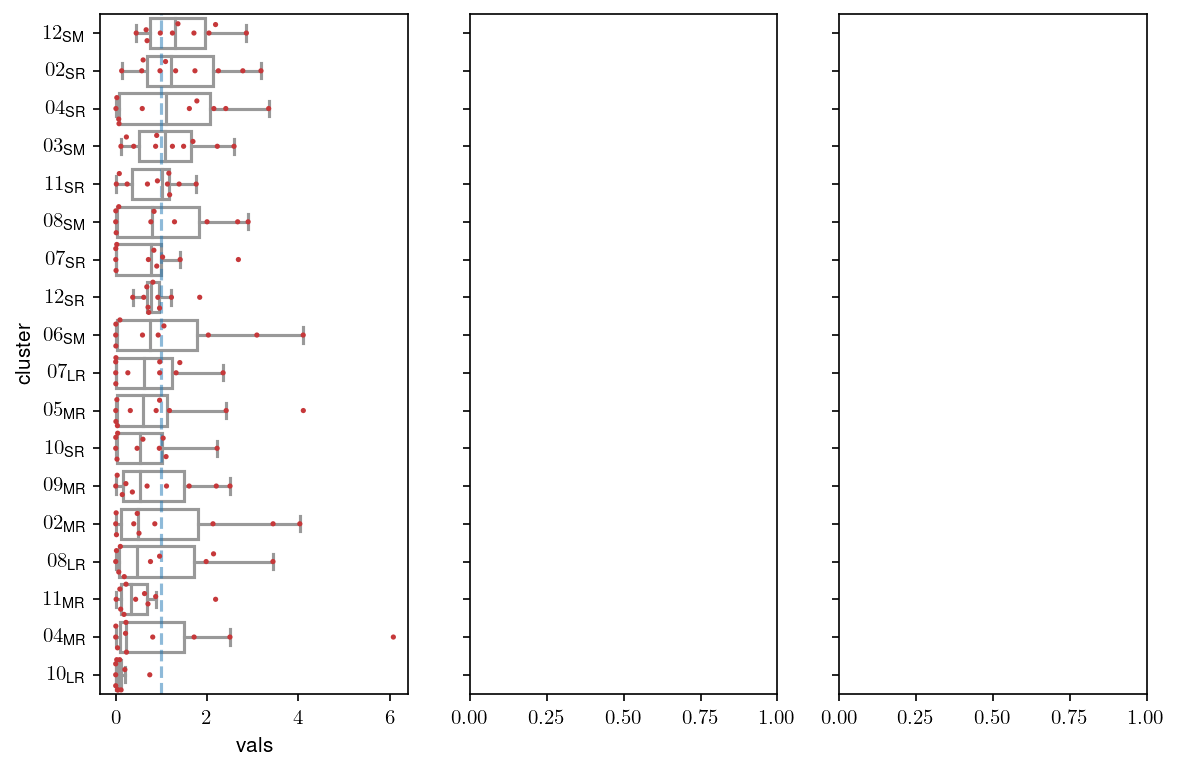

/Users/diego/flexpart_management/flexpart_management/notebooks/george_data_analysisV02/correlate_high_iso_days_to_cl/correlate_high_iso_days_to_cl_lfc.py:150: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


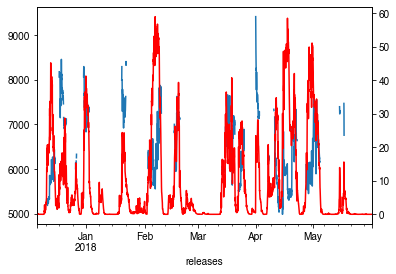

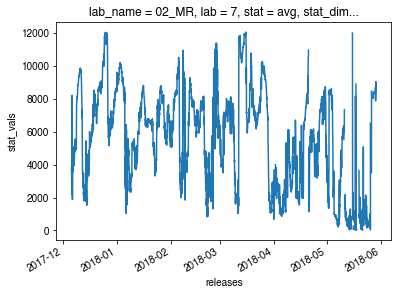

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


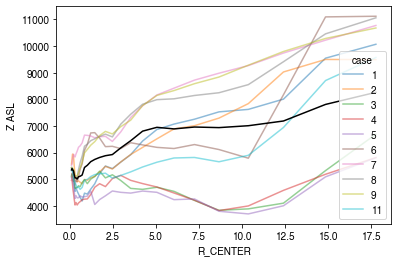

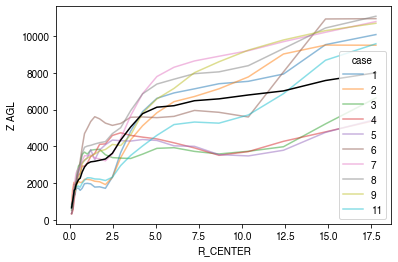

/Users/diego/flexpart_management/flexpart_management/notebooks/george_data_analysisV02/correlate_high_iso_days_to_cl/correlate_high_iso_days_to_cl_lfc.py:291: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.figure.show()
/Users/diego/flexpart_management/flexpart_management/notebooks/george_data_analysisV02/correlate_high_iso_days_to_cl/correlate_high_iso_days_to_cl_lfc.py:291: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.figure.show()


1


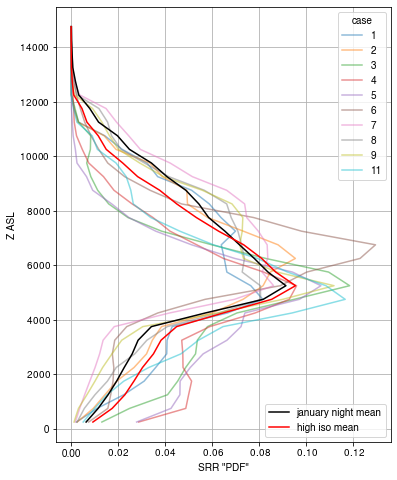

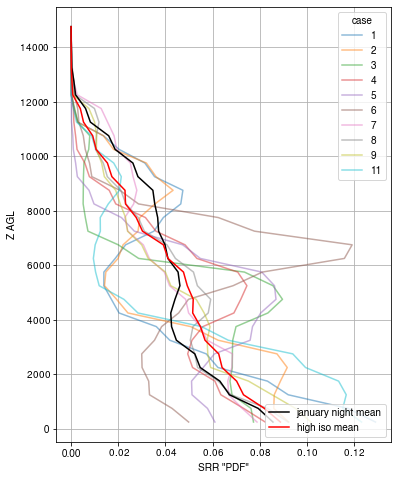

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/matplotlib/mathtext.py:2542: SyntaxWarning: Exception creating Regex for oneOf, building MatchFirst
  p.subsuperop    <<= oneOf(["_", "^"])


ValueError: 
10_{\text{LR}}
    ^
Unknown symbol: \text, found '\'  (at char 4), (line:1, col:5)

<Figure size 864x864 with 10 Axes>

2
3
4
5
6
7
8
9
11


/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/ipykernel_launcher.py:93: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [3]:
if __name__ == '__main__':
    main()